# Potential Prediction Model for Ultra Plan Users

This task requires us to create a suitable model for users based on consumer behavior. This model will analyze consumer behavior and recommend one of Megaline's two newest packages: Smart or Ultra. We want the model created to have an accuracy of at least 75%. The steps that must be taken are that we look for general information from the data provided, then we divide the data into training data (70%) and test data (30%), to validate 30% of the test data. After dividing the data, the model was tested using Logistic Regression, Decision Tree, and Random Forest. After that, Data Testing was carried out and the one with the best accuracy was selected from the three models.

# Table of Content:

1. General Info
2. Splitting Data
3. Testing Model
4. Prediksi Data Testing
5. Conclusion

## General Info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [6]:
data.duplicated().sum()

0

Conclusion: Based on the general information above, there is no missing data and the data type is also appropriate.

## Splitting Data

We will divide the data provided into 70% training data, 30% test data, and 30% test data for validation data.

In [7]:
X = data.drop('is_ultra', axis = 1)
y = data['is_ultra']

In [8]:
# Divide data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [9]:
X_train.shape

(2249, 4)

In [10]:
X_test.shape

(965, 4)

In [11]:
# Divide data into test and validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.333, random_state = 23)

In [12]:
X_val.shape

(643, 4)

In [13]:
X_test.shape

(322, 4)

In [14]:
data_ultra = data.copy()
data_ultra['is_ultra'] = data_ultra['is_ultra'].astype(str)

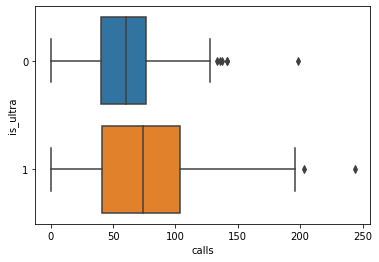

In [15]:
sns.boxplot(data=data_ultra, x = 'calls', y = 'is_ultra')
plt.show()

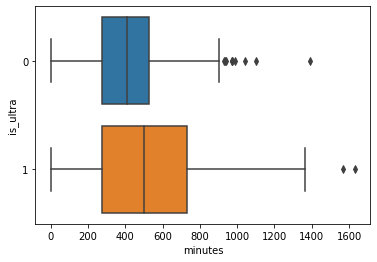

In [16]:
sns.boxplot(data=data_ultra, x = 'minutes', y = 'is_ultra')
plt.show()

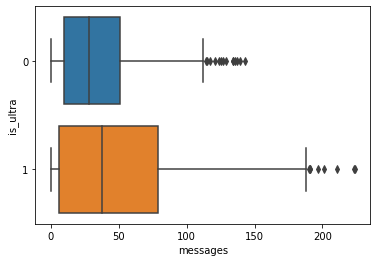

In [17]:
sns.boxplot(data=data_ultra, x = 'messages', y = 'is_ultra')
plt.show()

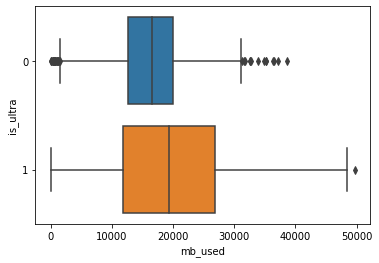

In [18]:
sns.boxplot(data=data_ultra, x = 'mb_used', y = 'is_ultra')
plt.show()

Conclusion: We divide the data into training data (70%), test data (30%), and validation data (30% of test data). Then, we look at the data distribution using a boxplot. From the boxplot we can see that the distribution of users who use the Ultra Package is slightly spread out in terms of call usage, SMS and internet data usage.

## Testing Model

### Logistic Regression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_train_pred = lr.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7114273010226767

In [21]:
y_val_pred = lr.predict(X_val)
accuracy_score(y_val, y_val_pred)

0.6656298600311042

**Hyperparameter Tuning Logistic Regression**

In [22]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
y_train_pred = lr.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.7514450867052023

In [24]:
y_val_pred = lr.predict(X_val)
accuracy_score(y_val, y_val_pred)

0.7216174183514774

Conclusion: After changing the hyperparameters, the accuracy increased to 72% from the previous 66% for validation. Meanwhile, training increased from the previous 71% to 75%.

### Decision Tree

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_train_pred_dt = dt.predict(X_train)
accuracy_score(y_train, y_train_pred_dt)

1.0

In [27]:
y_val_pred_dt = dt.predict(X_val)
accuracy_score(y_val, y_val_pred_dt)

0.7278382581648523

**Hyperparameter Tuning Decision Tree**

For Decision Trees we use Hyperparameters and carry out trials until we find that the difference in accuracy between training data and validation data is small.

In [28]:
dt = DecisionTreeClassifier(max_depth=3, criterion ='gini', random_state = 23)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

In [29]:
y_train_pred_dt = dt.predict(X_train)
accuracy_score(y_train, y_train_pred_dt)

0.8030235660293463

In [30]:
y_val_pred_dt = dt.predict(X_val)
accuracy_score(y_val, y_val_pred_dt)

0.7729393468118196

Conclusion: After changing the hyperparameters using max_depth, criterion, and random_state, it was found that the score accuracy increased in validation by 77%. Different from before which was still 71.8%.

### Random Forest

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_train_pred_rf = rf.predict(X_train)
accuracy_score(y_train, y_train_pred_rf)

0.9995553579368608

In [33]:
y_val_pred_rf = rf.predict(X_val)
accuracy_score(y_val, y_val_pred_rf)

0.8040435458786936

**Hyperparameter Tuning Random Forest**

In [34]:
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [35]:
y_train_pred_rf = rf.predict(X_train)
accuracy_score(y_train, y_train_pred_rf)

0.8070253445975989

In [36]:
y_val_pred_rf = rf.predict(X_val)
accuracy_score(y_val, y_val_pred_rf)

0.7791601866251944

Conclusion: After changing the hyperparameter with max_depth, the validation accuracy score decreased to 77.7% from the previous 80.3%, but the difference between training and validation decreased to 2.7%, so this is better than previously the difference between training and validation reached 20%.

## Prediksi Data testing

In [37]:
#Testing Logistic Regression
y_test_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_test_pred_lr)

0.7515527950310559

In [38]:
#Testing Decision Tree
y_test_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_test_pred_dt)

0.7888198757763976

In [39]:
#Testing Random Forest
y_test_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_test_pred_rf)

0.7919254658385093

Conclusion: After the data model was carried out using Logistic Regression, Decision Tree, and Random Forest, prediction testing data was carried out and the accuracy of Logistic Regression, Decision Tree, and Random Forest was 70%, 78.8%, and 79.5%, respectively. From the accuracy score results, it can be concluded that Random Forest is a machine learning algorithm model that is suitable for modeling this task.

## Conclusion

We have created a model to predict consumers who have the potential to use the Ultra Package. The steps that have been taken are searching for general information to find out the data content, data type, and checking for missing values. After that, the data was divided into training data (70%), test data (30%), and validation data (30% of the test data). Then a machine learning model was created using Logistic Regression, Decision Tree, and Random Forest. Once completed, testing is carried out to determine the level of accuracy of the three models. From the test results, it was found that the accuracy of Logistic Regression, Decision Tree, and Random Forest was 70%, 78.8%, and 79.5%, respectively. From the accuracy score results, it can be concluded that Random Forest is a machine learning algorithm model that is suitable for modeling this task.